In [52]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
def miles_to_kilometers(miles):
    try:
        return miles * 1.60934
    except:
        return 0

In [62]:
platform_service = pd.read_csv('tfl_station_data/PlatformServices.csv')
platform_service.head(5)

,PlatformUniqueId,StopAreaNaptanCode,Line,DirectionTowards,MinGap,MaxGap,AverageGap,MinStep,MaxStep,AverageStep,DesignatedLevelAccessPoint,LocationOfLevelAccess,LevelAccessByManualRamp,AdditionalAccessibilityInformation,GroupName
0,HUBABW-Plat01-WB-national-rail,910GABWD,national-rail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN
1,HUBABW-Plat02-EB-national-rail,910GABWD,national-rail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN
2,HUBABW-Plat03-WB-elizabeth,910GABWD,elizabeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN
3,HUBABW-Plat04-WB-elizabeth,910GABWD,elizabeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN
4,910GACTNCTL-Plat01-WB-london-overground,910GACTNCTL,london-overground,Richmond,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,Step-free platform interchange requires a 50m ...,NaN


In [63]:
platform_service = platform_service[['PlatformUniqueId', 'StopAreaNaptanCode','Line']]
platform_service.head(10)

,PlatformUniqueId,StopAreaNaptanCode,Line
0,HUBABW-Plat01-WB-national-rail,910GABWD,national-rail
1,HUBABW-Plat02-EB-national-rail,910GABWD,national-rail
2,HUBABW-Plat03-WB-elizabeth,910GABWD,elizabeth
3,HUBABW-Plat04-WB-elizabeth,910GABWD,elizabeth
4,910GACTNCTL-Plat01-WB-london-overground,910GACTNCTL,london-overground
5,910GACTNCTL-Plat02-EB-london-overground,910GACTNCTL,london-overground
6,910GACTONML-Plat03-WB-elizabeth,910GACTONML,elizabeth
7,910GACTONML-Plat04-EB-elizabeth,910GACTONML,elizabeth
8,910GANERLEY-Plat01-NB-london-overground,910GANERLEY,london-overground
9,910GANERLEY-Plat02-SB-london-overground,910GANERLEY,london-overground


In [64]:
platform_service['StationId'] = platform_service['PlatformUniqueId'].str.split('-').str[0]
platform_service = platform_service.drop_duplicates(subset=['StationId'], keep='last')
platform_service.head() 

,PlatformUniqueId,StopAreaNaptanCode,Line,StationId
3,HUBABW-Plat04-WB-elizabeth,910GABWD,elizabeth,HUBABW
5,910GACTNCTL-Plat02-EB-london-overground,910GACTNCTL,london-overground,910GACTNCTL
7,910GACTONML-Plat04-EB-elizabeth,910GACTONML,elizabeth,910GACTONML
9,910GANERLEY-Plat02-SB-london-overground,910GANERLEY,london-overground,910GANERLEY
11,910GBCKNHMH-Plat02-SB-thameslink,910GBCKNHMH,thameslink,910GBCKNHMH


In [65]:
platform_service = platform_service.drop(columns={'PlatformUniqueId','StopAreaNaptanCode'})

In [66]:
platform_service.head()

,Line,StationId
3,elizabeth,HUBABW
5,london-overground,910GACTNCTL
7,elizabeth,910GACTONML
9,london-overground,910GANERLEY
11,thameslink,910GBCKNHMH


In [98]:
stations_df = pd.read_csv('tfl_station_data/Stations.csv')
stations_df = stations_df[['UniqueId', 'Name', 'FareZones']]
stations_df.rename(columns={'UniqueId':'StationId'}, inplace=True)
stations_df.head(5)

,StationId,Name,FareZones
0,HUBABW,Abbey Wood,4
1,910GACTNCTL,Acton Central,3
2,910GACTONML,Acton Main Line,3
3,910GANERLEY,Anerley,4
4,910GBCKNHMH,Beckenham Hill,4


In [83]:
# station_data = pd.merge(stations_df, platform_service, on='StationId', how='left')
# station_data.head(10)

,StationId,Name,FareZones,Line
0,HUBABW,Abbey Wood,4,elizabeth
1,910GACTNCTL,Acton Central,3,london-overground
2,910GACTONML,Acton Main Line,3,elizabeth
3,910GANERLEY,Anerley,4,london-overground
4,910GBCKNHMH,Beckenham Hill,4,thameslink
5,910GBELNGHM,Bellingham,3,thameslink
6,910GBHILLPK,Bush Hill Park,5,london-overground
7,910GBICKLEY,Bickley,5,national-rail
8,910GBNHAM,Burnham,Outside,elizabeth
9,910GBRBY,Brondesbury,2,london-overground


In [95]:
station_points = pd.read_csv('tfl_station_data/StationPoints.csv')
station_points.head(10)

,UniqueId,StationUniqueId,AreaName,AreaId,Level,Lat,Lon,FriendlyName
0,910GACTNCTL-1001002-AC-3,910GACTNCTL,AC,3,0,51.50862,-0.26351,AC
1,910GACTNCTL-1001002-Bus-1,910GACTNCTL,Bus,1,0,51.50651,-0.26372,Bus
2,910GACTNCTL-1001002-ENTR-7,910GACTNCTL,ENTR,7,0,51.50892,-0.26260,ENTR
3,910GACTNCTL-1001002-RLY-4,910GACTNCTL,RLY,4,1,51.50865,-0.26293,RLY
4,910GACTNCTL-1001002-RPL-2,910GACTNCTL,RPL,2,1,51.50865,-0.26306,RPL
5,910GACTNCTL-1001002-RPL-5,910GACTNCTL,RPL,5,1,51.50865,-0.26271,RPL
6,910GACTNCTL-1001002-Sub-6,910GACTNCTL,Sub,6,-1,51.50856,-0.26325,Sub
7,910GACTONML-1001003-AC-B-3,910GACTONML,AC-B,3,0,51.51732,-0.26669,AC-B
8,910GACTONML-1001003-AC-S-6,910GACTONML,AC-S,6,0,51.51680,-0.26736,AC-S
9,910GACTONML-1001003-Bus-1,910GACTONML,Bus,1,0,51.51772,-0.26612,Bus


In [99]:
station_points = station_points.drop_duplicates(subset=['StationUniqueId'], keep='last')
station_points = station_points[['StationUniqueId', 'Lat', 'Lon']]
station_points.rename(columns={'StationUniqueId':'StationId'}, inplace=True)
station_points.head(10)

,StationId,Lat,Lon
6,910GACTNCTL,51.50856,-0.26325
12,910GACTONML,51.51693,-0.26973
19,910GANERLEY,51.41247,-0.06538
26,910GBCKNHMH,51.42483,-0.01617
31,910GBELNGHM,51.43299,-0.01936
38,910GBHILLPK,51.64187,-0.06947
43,910GBICKLEY,51.40015,0.04485
49,910GBKRVS,51.51953,0.11596
55,910GBNHAM,51.52323,-0.64595
60,910GBRBY,51.54505,-0.20252


In [ ]:
station_data = pd.merge(stations_df, platform_service, on='StationId', how='left')
station_data.head(10)

In [90]:
# Group by 'Line' and reset the index
station_data = station_data.groupby('Line').apply(lambda x: x.reset_index(drop=True)).reset_index(drop=True)

C:\Users\hongt\AppData\Local\Temp\ipykernel_15712\2535888153.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  station_data = station_data.groupby('Line').apply(lambda x: x.reset_index(drop=True)).reset_index(drop=True)


In Stations.csv, the UniqueId and name collumns are used for modifying the station id and name of the station. The UniqueId columns can compare with the PlatformUniqueId in PlatformService.csv to adding the Line column for type of life service.

In [37]:
station_points = station_points.drop_duplicates(subset=['StationUniqueId'], keep='last')
station_points.head(10)

,UniqueId,StationUniqueId,AreaName,AreaId,Level,Lat,Lon,FriendlyName
6,910GACTNCTL-1001002-Sub-6,910GACTNCTL,Sub,6,-1,51.50856,-0.26325,Sub
12,910GACTONML-1001003-RPL2-5,910GACTONML,RPL2,5,-1,51.51693,-0.26973,RPL2
19,910GANERLEY-1001007-RPL-S-2,910GANERLEY,RPL-S,2,0,51.41247,-0.06538,RPL-S
26,910GBCKNHMH-1001017-RPL-S-3,910GBCKNHMH,RPL-S,3,0,51.42483,-0.01617,RPL-S
31,910GBELNGHM-1001019-RPL S-2,910GBELNGHM,RPL S,2,0,51.43299,-0.01936,RPL S
38,910GBHILLPK-1001042-RPL-S-5,910GBHILLPK,RPL-S,5,0,51.64187,-0.06947,RPL-S
43,910GBICKLEY-1001026-RPL2-2,910GBICKLEY,RPL2,2,-1,51.40015,0.04485,RPL2
49,910GBKRVS-1002272-RREnt-1,910GBKRVS,RREnt,1,0,51.51953,0.11596,RREnt
55,910GBNHAM-1000860-UP-4,910GBNHAM,UP,4,0,51.52323,-0.64595,UP
60,910GBRBY-1001038-RPL-W-5,910GBRBY,RPL-W,5,1,51.54505,-0.20252,RPL-W


In [38]:
station_points.rename(columns={'StationUniqueId':'StationId'}, inplace=True)

In [39]:
station_data = pd.merge(stations_df, station_points, on='StationId', how='left')
station_data.head(10)

,StationId,Name,FareZones,UniqueId,AreaName,AreaId,Level,Lat,Lon,FriendlyName
0,HUBABW,Abbey Wood,4,HUBABW-1001001-WILTO-1,WILTO,1,0,51.49081,0.12131,WILTO
1,910GACTNCTL,Acton Central,3,910GACTNCTL-1001002-Sub-6,Sub,6,-1,51.50856,-0.26325,Sub
2,910GACTONML,Acton Main Line,3,910GACTONML-1001003-RPL2-5,RPL2,5,-1,51.51693,-0.26973,RPL2
3,910GANERLEY,Anerley,4,910GANERLEY-1001007-RPL-S-2,RPL-S,2,0,51.41247,-0.06538,RPL-S
4,910GBCKNHMH,Beckenham Hill,4,910GBCKNHMH-1001017-RPL-S-3,RPL-S,3,0,51.42483,-0.01617,RPL-S
5,910GBELNGHM,Bellingham,3,910GBELNGHM-1001019-RPL S-2,RPL S,2,0,51.43299,-0.01936,RPL S
6,910GBHILLPK,Bush Hill Park,5,910GBHILLPK-1001042-RPL-S-5,RPL-S,5,0,51.64187,-0.06947,RPL-S
7,910GBICKLEY,Bickley,5,910GBICKLEY-1001026-RPL2-2,RPL2,2,-1,51.40015,0.04485,RPL2
8,910GBNHAM,Burnham,Outside,910GBNHAM-1000860-UP-4,UP,4,0,51.52323,-0.64595,UP
9,910GBRBY,Brondesbury,2,910GBRBY-1001038-RPL-W-5,RPL-W,5,1,51.54505,-0.20252,RPL-W


In [40]:
area_counts = station_data.groupby('AreaName').size().reset_index(name='Count')
total_count = area_counts['Count'].sum()

# Display the result
print("Total count of AreaName:", total_count)
# Display the result
print(area_counts)

Total count of AreaName: 509
    AreaName  Count
0      DLR-N      1
1      DLR-S      1
2       DLRS      2
3        DRB      1
4       EAST      1
..       ...    ...
127    Walkw      2
128    Water      1
129    Wodla      1
130    XREnt      1
131    YFBdg      1

[132 rows x 2 columns]


In [41]:
station_data.shape

(509, 10)

In [42]:
station_data = pd.merge(station_data, platform_sevice, on='StationId', how='left')
station_data.head(10)

,StationId,Name,FareZones,UniqueId,AreaName,AreaId,Level,Lat,Lon,FriendlyName,StopAreaNaptanCode,Line
0,HUBABW,Abbey Wood,4,HUBABW-1001001-WILTO-1,WILTO,1,0,51.49081,0.12131,WILTO,910GABWD,national-rail
1,HUBABW,Abbey Wood,4,HUBABW-1001001-WILTO-1,WILTO,1,0,51.49081,0.12131,WILTO,910GABWD,elizabeth
2,910GACTNCTL,Acton Central,3,910GACTNCTL-1001002-Sub-6,Sub,6,-1,51.50856,-0.26325,Sub,910GACTNCTL,london-overground
3,910GACTONML,Acton Main Line,3,910GACTONML-1001003-RPL2-5,RPL2,5,-1,51.51693,-0.26973,RPL2,910GACTONML,elizabeth
4,910GANERLEY,Anerley,4,910GANERLEY-1001007-RPL-S-2,RPL-S,2,0,51.41247,-0.06538,RPL-S,910GANERLEY,london-overground
5,910GBCKNHMH,Beckenham Hill,4,910GBCKNHMH-1001017-RPL-S-3,RPL-S,3,0,51.42483,-0.01617,RPL-S,910GBCKNHMH,thameslink
6,910GBELNGHM,Bellingham,3,910GBELNGHM-1001019-RPL S-2,RPL S,2,0,51.43299,-0.01936,RPL S,910GBELNGHM,thameslink
7,910GBHILLPK,Bush Hill Park,5,910GBHILLPK-1001042-RPL-S-5,RPL-S,5,0,51.64187,-0.06947,RPL-S,910GBHILLPK,london-overground
8,910GBICKLEY,Bickley,5,910GBICKLEY-1001026-RPL2-2,RPL2,2,-1,51.40015,0.04485,RPL2,910GBICKLEY,national-rail
9,910GBNHAM,Burnham,Outside,910GBNHAM-1000860-UP-4,UP,4,0,51.52323,-0.64595,UP,910GBNHAM,elizabeth


In [43]:
stops_df = pd.read_csv("tfl_station_data/stops.txt")
pathways_df = pd.read_csv("tfl_station_data/pathways.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'tfl_station_data/stops.txt'

In [383]:
import os

lines_group = station_data.groupby('Line')

if not os.path.exists('StationData'):
    os.makedirs('StationData')

for line, group in lines_group:
    filename = f"StationData/{line}.csv"
    group.to_csv(filename, index=False)
    print(line)
    print(f"Saved {filename}")

bakerloo
Saved StationData/bakerloo.csv
central
Saved StationData/central.csv
circle
Saved StationData/circle.csv
district
Saved StationData/district.csv
dlr
Saved StationData/dlr.csv
elizabeth
Saved StationData/elizabeth.csv
hammersmith-city
Saved StationData/hammersmith-city.csv
jubilee
Saved StationData/jubilee.csv
london-cable-car
Saved StationData/london-cable-car.csv
london-overground
Saved StationData/london-overground.csv
metropolitan
Saved StationData/metropolitan.csv
national-rail
Saved StationData/national-rail.csv
northern
Saved StationData/northern.csv
piccadilly
Saved StationData/piccadilly.csv
thameslink
Saved StationData/thameslink.csv
tram
Saved StationData/tram.csv
victoria
Saved StationData/victoria.csv
waterloo-city
Saved StationData/waterloo-city.csv


Now the stations are group by line and save into csv file.

In [384]:
piccadilly_df = pd.read_csv('StationData/piccadilly.csv')
piccadilly_df.head()

,StationId,Name,UniqueId,AreaName,AreaId,Lat,Lon,StopAreaNaptanCode,Line
0,940GZZLUACT,Acton Town,940GZZLUACT-1000002-A-GUN-6,A-GUN,6,51.50301,-0.28042,940GZZLUACT,piccadilly
1,940GZZLUACT,Acton Town,940GZZLUACT-1000002-B-BOL-7,B-BOL,7,51.50324,-0.27991,940GZZLUACT,piccadilly
2,940GZZLUACT,Acton Town,940GZZLUACT-1000002-BookH-8,BookH,8,51.50299,-0.28054,940GZZLUACT,piccadilly
3,940GZZLUACT,Acton Town,940GZZLUACT-1000002-Bus-1,Bus,1,51.50327,-0.28031,940GZZLUACT,piccadilly
4,940GZZLUACT,Acton Town,940GZZLUACT-1000002-DisEB-3,DisEB,3,51.50284,-0.28001,940GZZLUACT,piccadilly


In [385]:
ramp_routes = pd.read_csv('tfl_station_data/SameLevelPaths.csv')
ramp_routes.head(10)

,From,To
0,910GACTNCTL-1001002-AC-3,910GACTNCTL-1001002-Bus-1
1,910GACTNCTL-1001002-Bus-1,910GACTNCTL-1001002-AC-3
2,910GACTNCTL-1001002-Bus-1,910GACTNCTL-1001002-ENTR-7
3,910GACTNCTL-1001002-ENTR-7,910GACTNCTL-1001002-Bus-1
4,910GACTNCTL-1001002-RLY-4,910GACTNCTL-1001002-RPL-2
5,910GACTNCTL-1001002-RPL-2,910GACTNCTL-1001002-RLY-4
6,910GACTONML-1001003-AC-B-3,910GACTONML-1001003-Bus-1
7,910GACTONML-1001003-AC-S-6,910GACTONML-1001003-Bus-1
8,910GACTONML-1001003-Bus-1,910GACTONML-1001003-AC-B-3
9,910GACTONML-1001003-Bus-1,910GACTONML-1001003-AC-S-6


In [386]:
unique_id_to_name = station_data.set_index('UniqueId')['Name'].to_dict()

# Map the From and To columns to station names
ramp_routes['From_Station'] = ramp_routes['From'].map(unique_id_to_name)
ramp_routes['To_Station'] = ramp_routes['To'].map(unique_id_to_name)
print(ramp_routes)

                                    From                                  To  \
0               910GACTNCTL-1001002-AC-3           910GACTNCTL-1001002-Bus-1   
1              910GACTNCTL-1001002-Bus-1            910GACTNCTL-1001002-AC-3   
2              910GACTNCTL-1001002-Bus-1          910GACTNCTL-1001002-ENTR-7   
3             910GACTNCTL-1001002-ENTR-7           910GACTNCTL-1001002-Bus-1   
4              910GACTNCTL-1001002-RLY-4           910GACTNCTL-1001002-RPL-2   
...                                  ...                                 ...   
7626  910GPETSWD-Plat01-NB-national-rail           910GPETSWD-1001226-RPL1-2   
7627           910GPETSWD-1001226-RPL2-3  910GPETSWD-Plat04-SB-national-rail   
7628           910GPETSWD-1001226-RPL2-3  910GPETSWD-Plat03-NB-national-rail   
7629  910GPETSWD-Plat04-SB-national-rail           910GPETSWD-1001226-RPL2-3   
7630  910GPETSWD-Plat03-NB-national-rail           910GPETSWD-1001226-RPL2-3   

       From_Station     To_Station  
0 

In [387]:
ramp_routes = ramp_routes.dropna(subset=['From_Station', 'To_Station'])

In [388]:
ramp_routes.head(10)

,From,To,From_Station,To_Station
0,910GACTNCTL-1001002-AC-3,910GACTNCTL-1001002-Bus-1,Acton Central,Acton Central
1,910GACTNCTL-1001002-Bus-1,910GACTNCTL-1001002-AC-3,Acton Central,Acton Central
2,910GACTNCTL-1001002-Bus-1,910GACTNCTL-1001002-ENTR-7,Acton Central,Acton Central
3,910GACTNCTL-1001002-ENTR-7,910GACTNCTL-1001002-Bus-1,Acton Central,Acton Central
4,910GACTNCTL-1001002-RLY-4,910GACTNCTL-1001002-RPL-2,Acton Central,Acton Central
5,910GACTNCTL-1001002-RPL-2,910GACTNCTL-1001002-RLY-4,Acton Central,Acton Central
6,910GACTONML-1001003-AC-B-3,910GACTONML-1001003-Bus-1,Acton Main Line,Acton Main Line
7,910GACTONML-1001003-AC-S-6,910GACTONML-1001003-Bus-1,Acton Main Line,Acton Main Line
8,910GACTONML-1001003-Bus-1,910GACTONML-1001003-AC-B-3,Acton Main Line,Acton Main Line
9,910GACTONML-1001003-Bus-1,910GACTONML-1001003-AC-S-6,Acton Main Line,Acton Main Line


In [389]:
ramp_routes = ramp_routes.drop_duplicates(subset=['From_Station','To_Station'])


In [390]:
different_stations = ramp_routes[ramp_routes['From_Station'] != ramp_routes['To_Station']]

# Display the result
print(different_stations)

Empty DataFrame
Columns: [From, To, From_Station, To_Station]
Index: []


In [391]:


# Merge 'From' area details
same_level_path_central = same_level_path.merge(central_stations, how='left', 
                                        left_on=['From_AreaName', 'From_AreaId'], 
                                        right_on=['AreaName', 'AreaId']) \
                                 .rename(columns={'Name': 'From_StationName'})

same_level_path_central = same_level_path.merge(central_stations, how='left', 
                                        left_on=['To_AreaName', 'To_AreaId'], 
                                        right_on=['AreaName', 'AreaId']) \
                                 .rename(columns={'Name': 'To_StationName'}) 
same_level_path_central.head(10)


KeyError: 'From_AreaName'

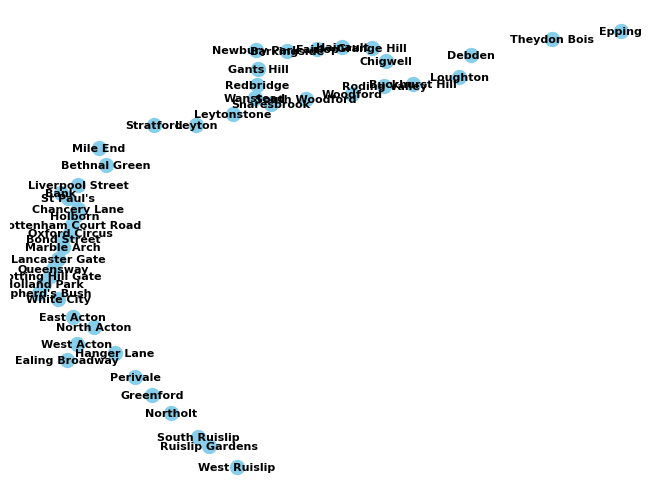

<Figure size 1000x800 with 0 Axes>

In [23]:
G = nx.Graph()
for idx, row in stations_df.iterrows():
    G.add_node(row['Name'], pos=(row['Lat']*100, row['Lon']*100))

positions = nx.get_node_attributes(G, 'pos')

nx.draw(G, positions, with_labels=True, node_size=100, node_color="skyblue", font_size=8, font_weight="bold", edge_color="gray")
plt.figure(figsize=(10, 8))
plt.show()

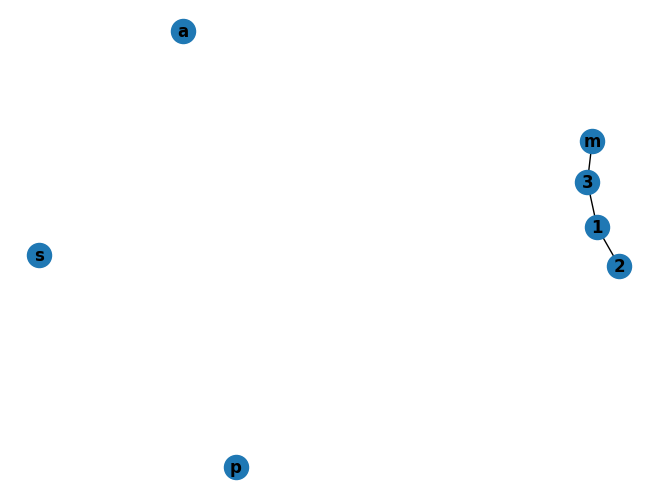

In [17]:
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (1, 3)])
G2.add_node(1)
G2.add_edge(1, 2)
G2.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G2.add_edge(3, 'm')
nx.draw(G2, with_labels=True, font_weight='bold')

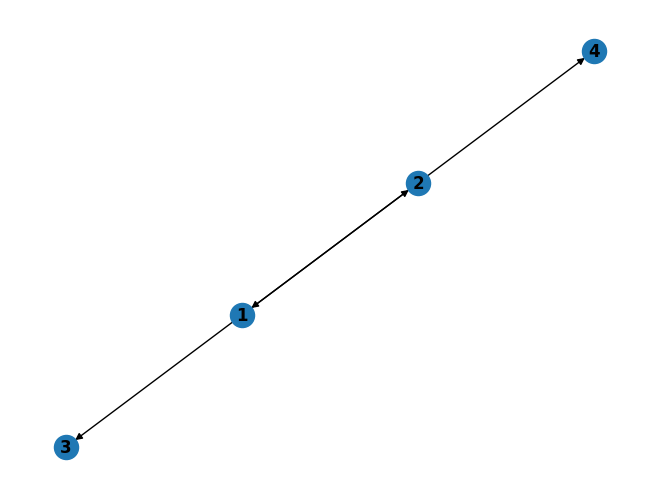

In [18]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]
nx.draw(DG, with_labels=True, font_weight='bold')

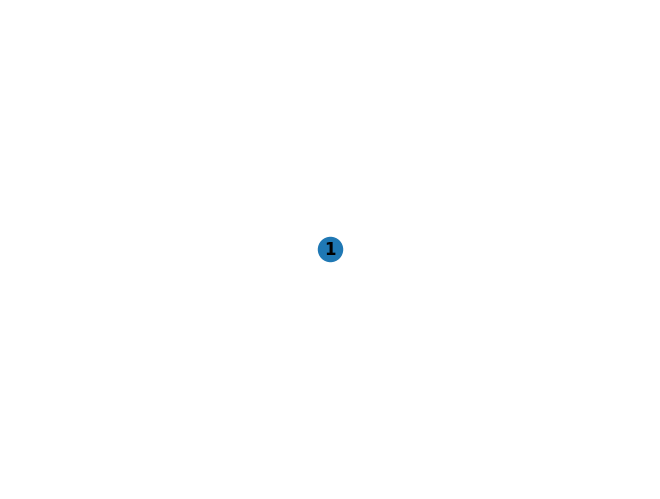

In [19]:
G3 = nx.Graph(day="Friday")
G3.graph
G3.add_node(1, time='3pm')
nx.draw(G3, with_labels=True, font_weight='bold')